In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'

In [3]:
ds = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80*'))] #local

In [4]:

Te = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in ds]#[d.E_u_avg.sel(param='Tt') for d in ds]#
Tl = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in ds]#[d.L_u_avg.sel(param='Tt') for d in ds]#
Tbe = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in ds]#[d.E_u_avg.sel(param='Tb') for d in ds]#
Tbl = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in ds]#[d.L_u_avg.sel(param='Tb') for d in ds]#
Ubar = [d.Uprime for d in ds]

NameError: name 'V' is not defined

In [58]:
Tl[0]

<xarray.Dataset>
Dimensions:       (ybin: 55)
Coordinates:
  * ybin          (ybin) float64 25.0 75.0 125.0 ... 2.675e+03 2.725e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'
Data variables:
    L_u_avg       (ybin) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    L_v_avg       (ybin) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [61]:
#xr.merge([Te[0][V] for V in ['E_u_avg','E_v_avg']])
i=0
[xr.merge([Te[i]['E'+V].where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True) for V in ['_u_avg','_v_avg']]) for i in range(len(Tl))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: I

[<xarray.Dataset>
 Dimensions:       (ybin: 32)
 Coordinates:
   * ybin          (ybin) float64 825.0 925.0 975.0 ... 2.375e+03 2.425e+03
     time_instant  float64 540.0
     time_counter  float64 540.0
     mode          int64 1
     param         <U2 'Tt'
 Data variables:
     E_u_avg       (ybin) float64 1.899e+03 1.962e+03 1.877e+03 ... 205.0 225.5
     E_v_avg       (ybin) float64 nan nan nan nan nan ... 272.5 274.7 290.0 299.8,
 <xarray.Dataset>
 Dimensions:       (ybin: 38)
 Coordinates:
   * ybin          (ybin) float64 575.0 625.0 675.0 ... 2.375e+03 2.425e+03
     time_instant  float64 540.0
     time_counter  float64 540.0
     mode          int64 1
     param         <U2 'Tt'
 Data variables:
     E_u_avg       (ybin) float64 1.496e+03 1.236e+03 1.193e+03 ... 85.96 89.63
     E_v_avg       (ybin) float64 nan nan nan nan nan ... 133.1 131.8 118.7 122.5,
 <xarray.Dataset>
 Dimensions:       (ybin: 38)
 Coordinates:
   * ybin          (ybin) float64 575.0 625.0 675.0 ... 2.37

In [5]:
Te_sat = [xr.merge([Te[i]['E'+V].where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True) for V in ['_u_avg','_v_avg']]) for i in range(len(Tl))]
Tl_sat = [xr.merge([Tl[i]['L'+V].where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True) for V in ['_u_avg','_v_avg']]) for i in range(len(Tl))]
Tbe_sat = [xr.merge([Tbe[i]['E'+V].where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True) for V in ['_u_avg','_v_avg']]) for i in range(len(Tl))]
Tbl_sat = [xr.merge([Tbl[i]['L'+V].where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True) for V in ['_u_avg','_v_avg']]) for i in range(len(Tl))]
#Ubar_sat = [Ubar[i].where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True) for i in range(len(Tl))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: I

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: I

In [47]:
Te_sat[0]

<xarray.Dataset>
Dimensions:       (ybin: 32)
Coordinates:
  * ybin          (ybin) float64 825.0 925.0 975.0 ... 2.375e+03 2.425e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'
Data variables:
    *empty*

In [ ]:
(1/Te[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]/Te[0]).plot.line('.',y='ybin')

In [ ]:
(1/Te_sat[0]).plot.line('.',y='ybin')
plt.figure()
(Tl_sat[0]).plot.line('.',y='ybin')
plt.figure()
(Tl_sat[0]/Te_sat[0]).plot.line('.',y='ybin')


In [94]:
Te_sat[-1]

<xarray.DataArray 'E_u_avg' (ybin: 37)>
array([997.67507856, 914.04919308, 816.62315592, 899.52725079,
       748.10708793, 709.01630162, 654.75639974, 623.5323544 ,
       540.32232634, 426.85857394, 359.71241092, 295.30538967,
       260.44311025, 207.00816235, 147.25222625, 104.7609759 ,
        80.91290963,  38.76878132,  31.71346284,  25.97507041,
        25.42601713,  25.17958523,  23.81443202,  21.73838835,
        24.2787315 ,  24.2152497 ,  20.10937841,  22.43651036,
        26.82645784,  21.30612606,  16.97154138,  19.16900282,
        22.43999528,  21.44450392,  19.80628279,  19.28752423,
        20.72325413])
Coordinates:
  * ybin          (ybin) float64 575.0 625.0 675.0 ... 2.425e+03 2.475e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

In [6]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def phi_sigma(tau,Tbar):
    return 1-2*(1-np.exp(-tau/Tbar))*Tbar/tau+(1-np.exp(-2*tau/Tbar))*Tbar/(2*tau)

In [7]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1) for vm in vmodes]

In [8]:
Tbmean = [(Tbe[i]+Tbl[i])/2 for i,x in enumerate(Tbe)]
Tbmean_sat = [(Tbe_sat[i]+Tbl_sat[i])/2 for i,x in enumerate(Tbe_sat)]

In [9]:
for i in range(len(Lt)):
    Lt[i] = Lt[i].assign_coords({'y_rho':Lt[i].y_rho.values*1e-3})

$\phi_{\mu}(\tau/\bar T)=1-e^{-\tau/\bar T}$

$\phi_{\sigma}(\tau/\bar T)=1 - 2 (1-e^{-\tau/\bar T}) \times \bar T/\tau + (1-e^{-2\tau/\bar T})/2 \times \bar T/\tau$

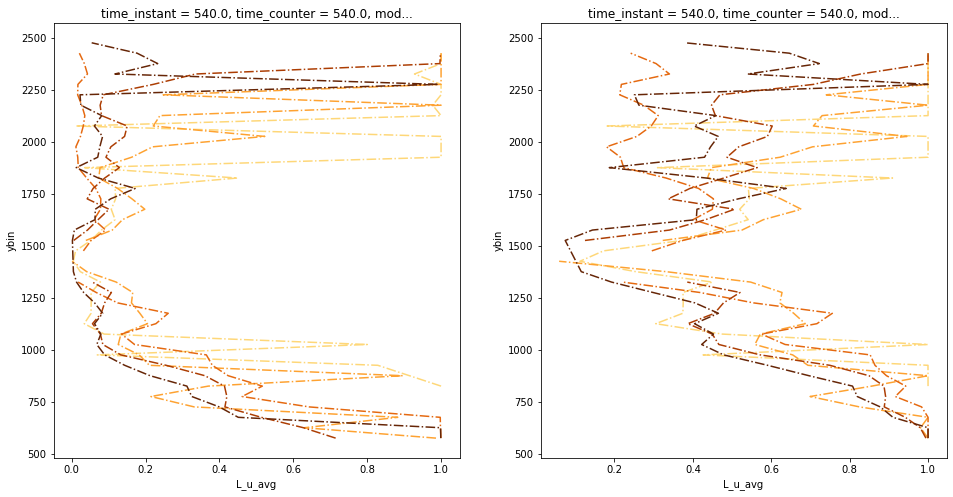

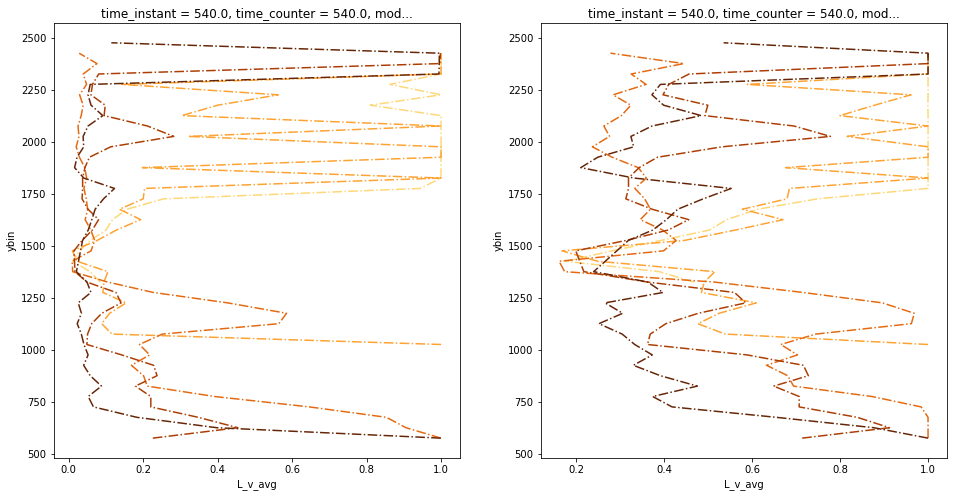

In [10]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
fig,ax = plt.subplots(1,2,figsize=(16,8))
for i,d in enumerate(ds):
    phi_sigma(Tl_sat[i]['L_u_avg'],Tbl_sat[i]['L_u_avg']).plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    phi_mu(Tl_sat[i]['L_u_avg'],Tbl_sat[i]['L_u_avg']).plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
fig,ax = plt.subplots(1,2,figsize=(16,8))
for i,d in enumerate(ds):
    phi_sigma(Tl_sat[i]['L_v_avg'],Tbl_sat[i]['L_v_avg']).plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    phi_mu(Tl_sat[i]['L_v_avg'],Tbl_sat[i]['L_v_avg']).plot.line('-.',ax=ax[1],y='ybin',c=colors[i])

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

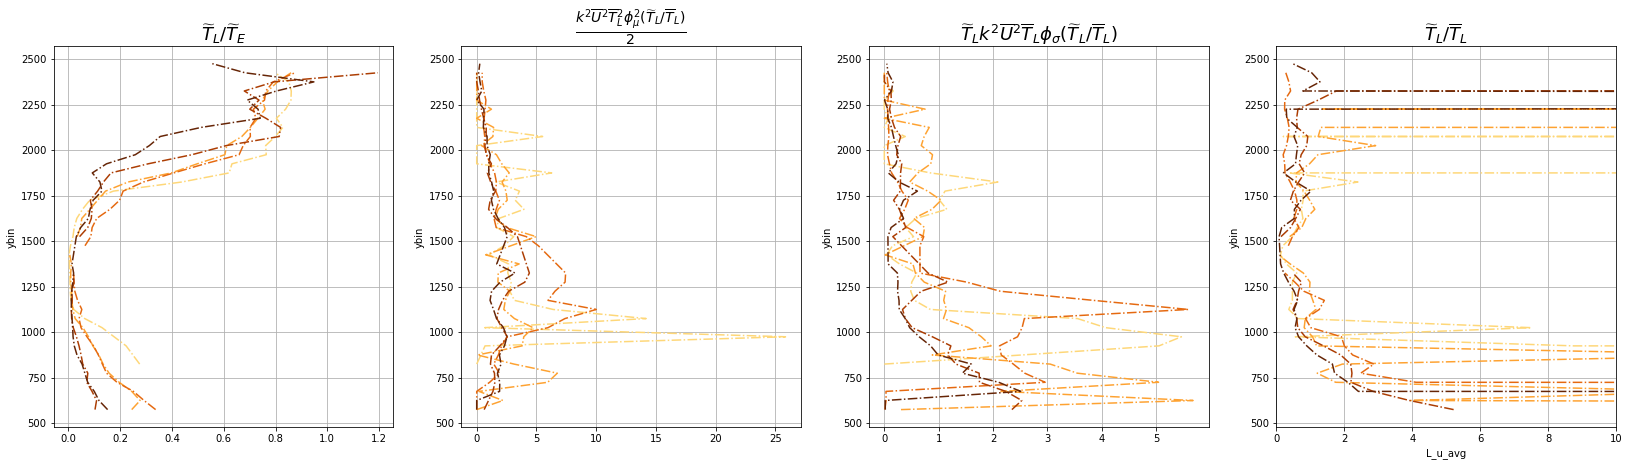

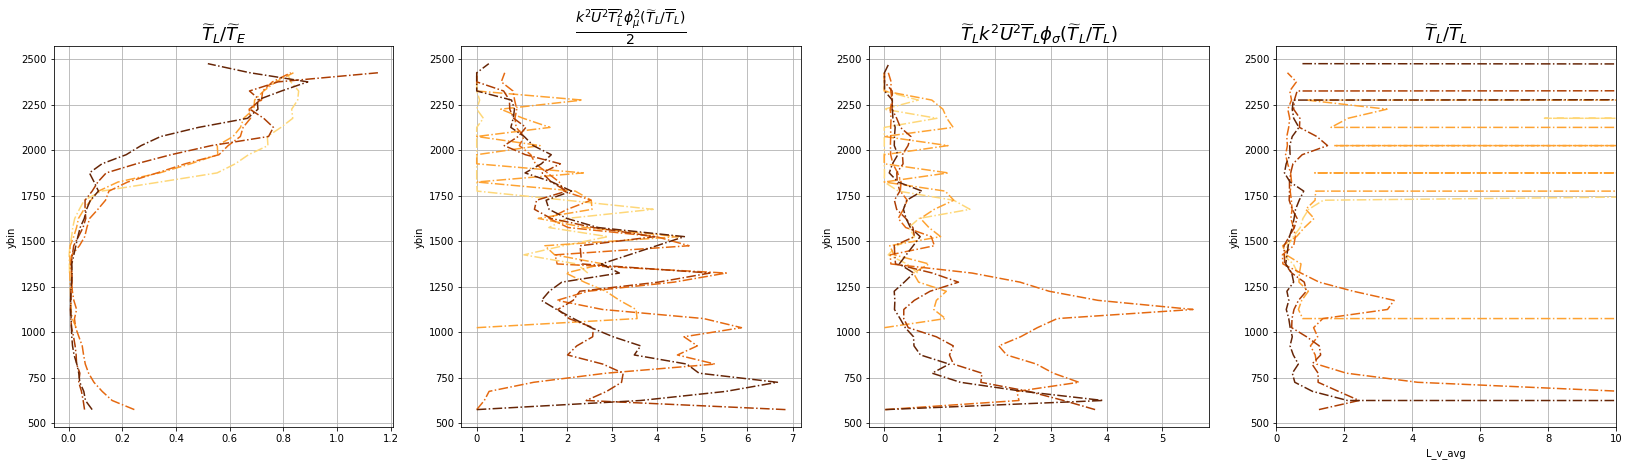

In [14]:
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,4,figsize=(28,7))
    for i,d in enumerate(ds):
        x1 = Tl_sat[i]['L'+V]/Te_sat[i]['E'+V]
        x2 = Tbl_sat[i]['L'+V]**2*phi_mu(Tl_sat[i]['L'+V],Tbl_sat[i]['L'+V])**2*(2*np.pi/d.Ta.where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True))**2
        x3 = (2*np.pi/d.Ta.where(Tl[i]['L'+V]>=1.1,drop=True).where(Te[i]['E'+V]<=2000,drop=True))**2*Tl_sat[i]['L'+V]*Tbl_sat[i]['L'+V]*phi_sigma(Tl_sat[i]['L'+V],Tbl_sat[i]['L'+V])
        x4 = Tl_sat[i]['L'+V]/Tbl_sat[i]['L'+V]
        x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
        x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])
        x4.plot.line('-.',ax=ax[3],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();ax[2].grid();ax[3].grid()
    ax[3].set_xlim(0,10)
    ax[0].set_title(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=18);
    ax[3].set_title(r'$\widetilde{T}_L/\overline{T}_L$',fontsize=18);
    ax[1].set_title(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\widetilde{T}_L/\overline{T}_L)}{2}$',fontsize=20);
    ax[2].set_title(r'$\widetilde{T}_Lk^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\widetilde{T}_L/\overline{T}_L)$',fontsize=18)
    fig.savefig('/Users/zcaspar/codes/dominant_terms'+V[:2]+'.eps')

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

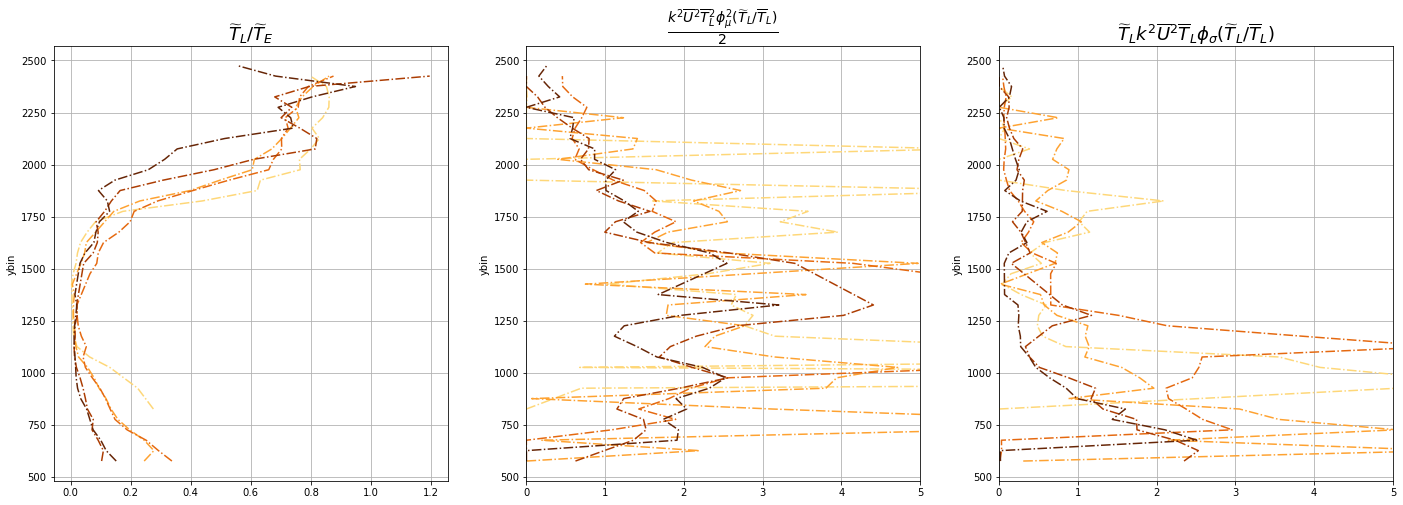

In [16]:
fig,ax = plt.subplots(1,4,figsize=(28,7))
for i,d in enumerate(ds):
    x1 = Tl_sat[i]/Te_sat[i]
    x2 = Tbl_sat[i]**2*phi_mu(Tl_sat[i],Tbl_sat[i])**2*(2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2
    x3 = (2*np.pi/d.Ta.where(Tl[i]>=1.1,drop=True).where(Te[i]<=2000,drop=True))**2*Tl_sat[i]*Tbl_sat[i]*phi_sigma(Tl_sat[i],Tbl_sat[i])
    x4 = Tl_sat[i]/Te_sat[i]
    x1.plot.line('-.',ax=ax[0],y='ybin',c=colors[i])
    x2.plot.line('-.',ax=ax[1],y='ybin',c=colors[i])
    x3.plot.line('-.',ax=ax[2],y='ybin',c=colors[i])
ax[1].set_xlim(0,5);ax[2].set_xlim(0,5)
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].set_title(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=18);
ax[1].set_title(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\widetilde{T}_L/\overline{T}_L)}{2}$',fontsize=20);
ax[2].set_title(r'$\widetilde{T}_Lk^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\widetilde{T}_L/\overline{T}_L)$',fontsize=18)
fig.savefig('/Users/zcaspar/codes/dominant_terms_zoom.eps')

### Autocovariance model for each term : 

In [9]:
def Ctilde_x1(tau,T,Tb,Xt):
    return Xt*np.cos(omega*tau)*np.exp(-tau/T)
def Ctilde_x2(tau,Tb,Ta,Xt):
    return Xt*np.cos(omega*tau)*np.exp(-Tb**2*phi_mu(tau,Tb)**2*(2*np.pi/Ta)**2)
def Ctilde_x3(tau,Tb,Ta,Xt):
    return Xt*np.cos(omega*tau)*np.exp(-tau*(2*np.pi/Ta)**2*Tb*phi_sigma(tau,Tb))
def Ctilde(tau,T,Tb,Ta,Xt):
    return Xt*np.cos(omega*tau)*np.exp(-tau/T-tau*(2*np.pi/Ta)**2*Tb*phi_sigma(tau,Tb)-Tb**2*phi_mu(tau,Tb)**2*(2*np.pi/Ta)**2)

In [10]:
tau = np.arange(0,40,10/(24*60))
omega = 2*np.pi*2
i=-2
y=700

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, '$\\tau k^2\\overline{U}^2\\overline{T}_L\\phi_{\\sigma}(\\tau/\\overline{T}_L)$')

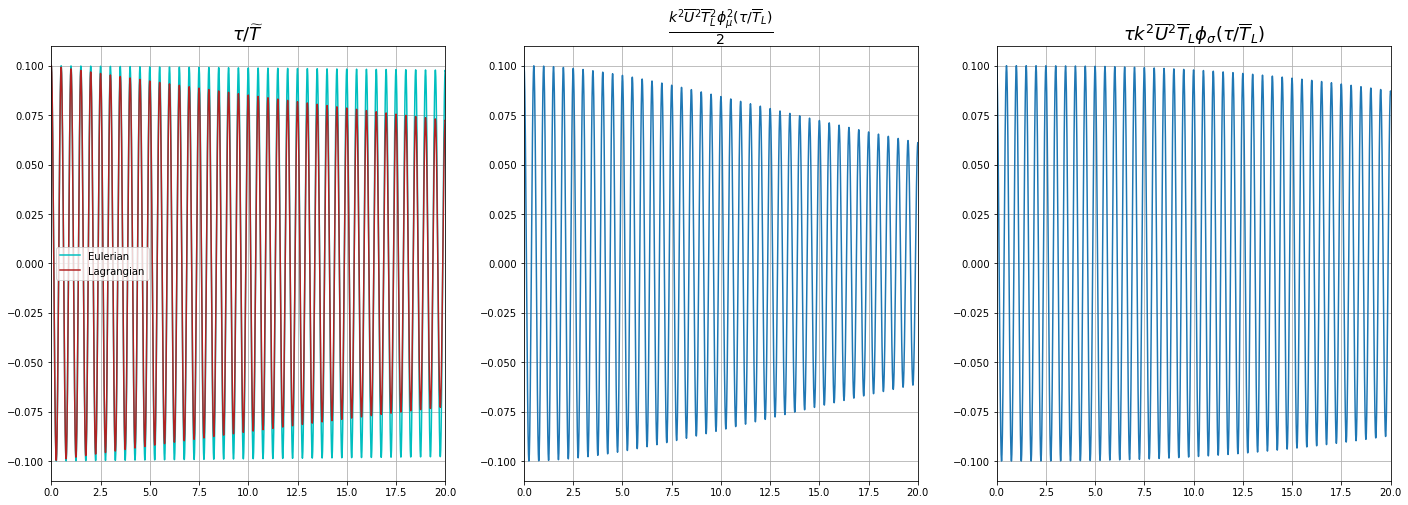

In [19]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
ax[0].plot(tau,Ctilde_x1(tau,Te_sat[i].sel(ybin=y,method='nearest').values,
          Tbl_sat[i].sel(ybin=y,method='nearest').values,0.1),c='c',label='Eulerian')
ax[0].plot(tau,Ctilde_x1(tau,Tl_sat[i].sel(ybin=y,method='nearest').values,
          Tbl_sat[i].sel(ybin=y,method='nearest').values,0.1),c='firebrick',label='Lagrangian')
ax[1].plot(tau,Ctilde_x2(tau,Tbl_sat[i].sel(ybin=y,method='nearest').values,
          ds[i].Ta.sel(ybin=y,method='nearest').values,0.1))
ax[2].plot(tau,Ctilde_x3(tau,Tbl_sat[i].sel(ybin=y,method='nearest').values,
          ds[i].Ta.sel(ybin=y,method='nearest').values,0.1))
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].legend();ax[0].set_xlim(0,20);ax[1].set_xlim(0,20);ax[2].set_xlim(0,20)
ax[0].set_title(r'$\tau/\widetilde{T}$',fontsize=18);
ax[1].set_title(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\tau/\overline{T}_L)}{2}$',fontsize=20);
ax[2].set_title(r'$\tau k^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\tau/\overline{T}_L)$',fontsize=18)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


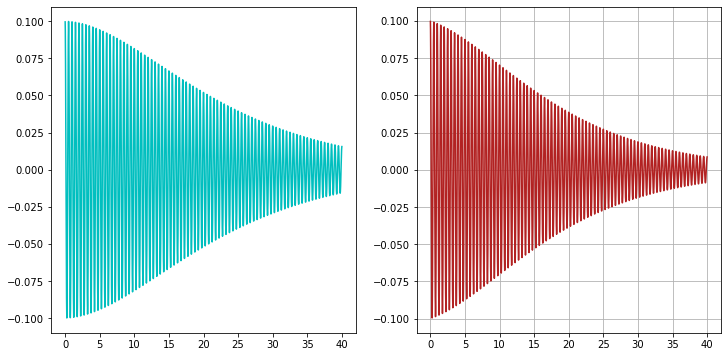

In [104]:
y=
fig,ax = plt.subplots(1,2,figsize=(12,6))

#ax[0].plot(tau,Ctilde_x1(tau,Te_sat[i].sel(ybin=y,method='nearest').values,
 #         Tbl_sat[i].sel(ybin=y,method='nearest').values,0.1),'c--',label='Eulerian')
#ax[1].plot(tau,Ctilde_x1(tau,Tl_sat[i].sel(ybin=y,method='nearest').values,
#          Tbl_sat[i].sel(ybin=y,method='nearest').values,0.1),c='firebrick',linestyle='--',label='Lagrangian')
ax[0].plot(tau, Ctilde(tau,Te_sat[i].sel(ybin=y,method='nearest').values,
                     Tbl_sat[i].sel(ybin=y,method='nearest').values,
                     ds[i].Ta.sel(ybin=y,method='nearest').values,0.1),c='c',label='Eulerian')
ax[1].plot(tau, Ctilde(tau,Tl_sat[i].sel(ybin=y,method='nearest').values,
                     Tbl_sat[i].sel(ybin=y,method='nearest').values,
                     ds[i].Ta.sel(ybin=y,method='nearest').values,0.1),c='firebrick',label='Lagrangian')

plt.grid()

### Plot Eulerian autocovariance vs model prediction : 

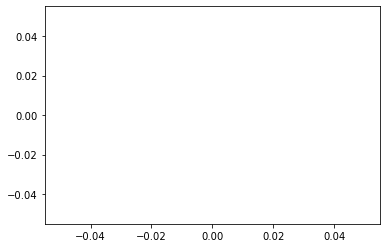

In [26]:
i=-2
y=1425
V='_u_avg'
plt.plot(tau, 0.1*np.cos(omega*tau)*np.exp(-tau/Te_sat[i]['E'+V].sel(ybin=y,method='nearest').values),c='c',zorder=-1,
                label='Fitted Eulerian autocovariance')
plt.plot(tau, 0.1*np.cos(omega*tau)*np.exp(-tau/Tl_sat[i]['L'+V].sel(ybin=y,method='nearest').values),c='firebrick',
                label='Fitted Lagrangian autocovariance')
#plt.plot(tau, Ctilde(tau,Te_sat[i]['E_u_avg'].sel(ybin=y,method='nearest').values,
#                     Tbl_sat[i]['L_u_avg'].sel(ybin=y,method='nearest').values,
#                     ds[i].Ta.sel(ybin=y,method='nearest').values,0.1),c='k',label='model (Lagrangian)')

In [24]:
Te_sat[i]['E'+V].sel(ybin=y,method='nearest')

<xarray.DataArray 'E_u_avg' ()>
array(nan)
Coordinates:
    ybin          float64 1.475e+03
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered

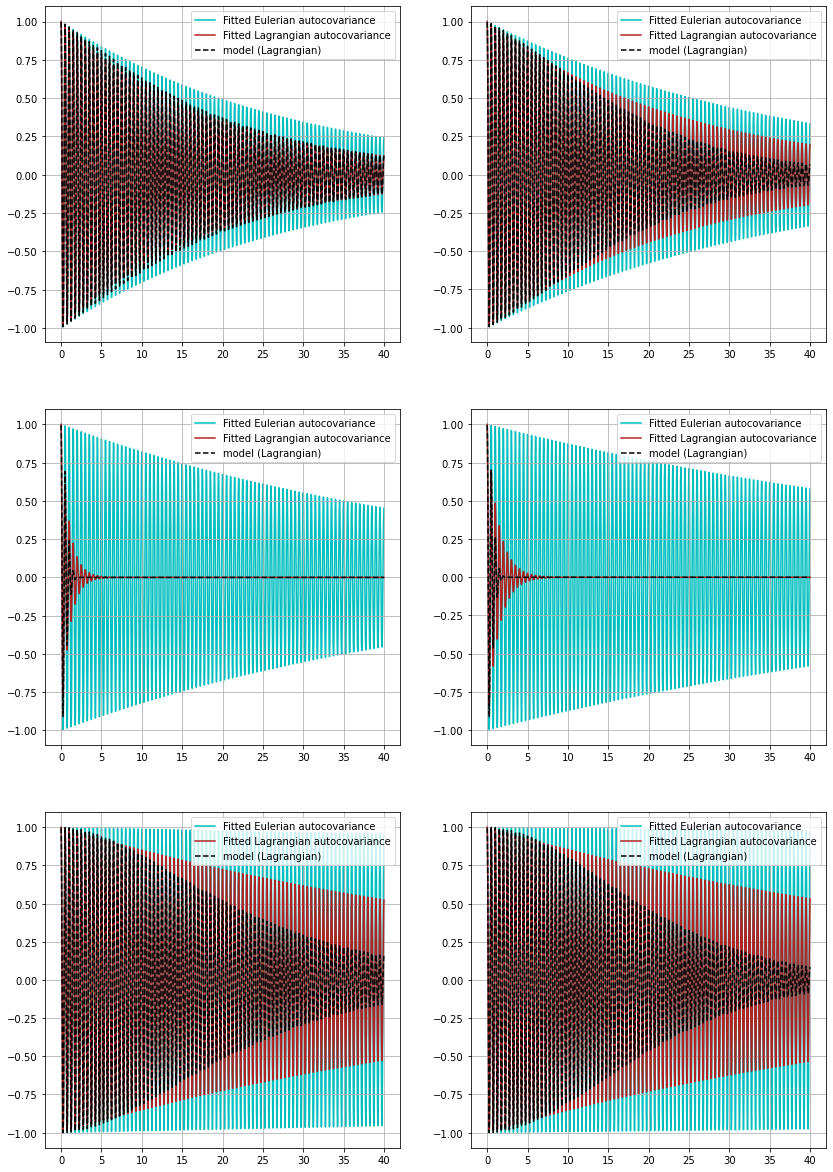

In [28]:
Y = [2300,1450,700]
i=-2
fig,axes = plt.subplots(3,2,figsize=(14,21))
for V, axs in zip(['_u_avg','_v_avg'],range(2)):
    for y, ax in zip(Y,axes[:,axs]):
        ax.plot(tau, 1*np.cos(omega*tau)*np.exp(-tau/Te[i]['E'+V].sel(ybin=y,method='nearest').values),c='c',zorder=-1,
                label='Fitted Eulerian autocovariance')
        ax.plot(tau, 1*np.cos(omega*tau)*np.exp(-tau/Tl[i]['L'+V].sel(ybin=y,method='nearest').values),c='firebrick',
                label='Fitted Lagrangian autocovariance')
        ax.plot(tau, Ctilde(tau,Te[i]['E'+V].sel(ybin=y,method='nearest').values,
                         Tbl[i]['L'+V].sel(ybin=y,method='nearest').values,
                         ds[i].Ta.sel(ybin=y,method='nearest').values,1),c='k',label='model (Lagrangian)',linestyle='--')
        ax.grid();ax.legend()
fig.savefig('/Users/zcaspar/codes/section_fit.eps')

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


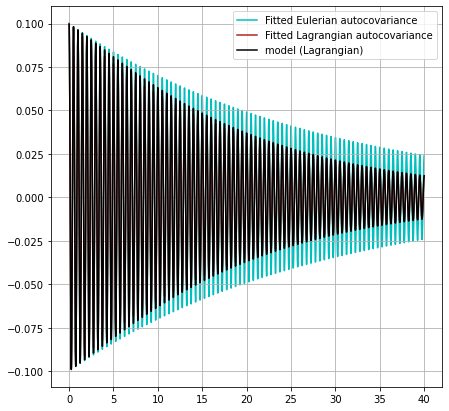

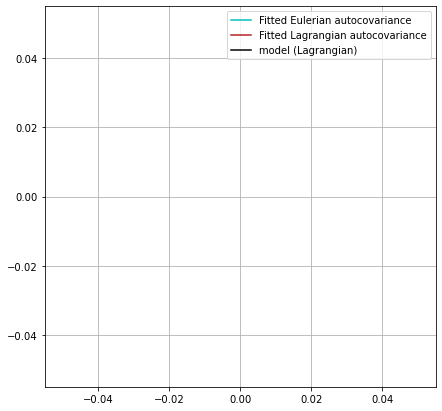

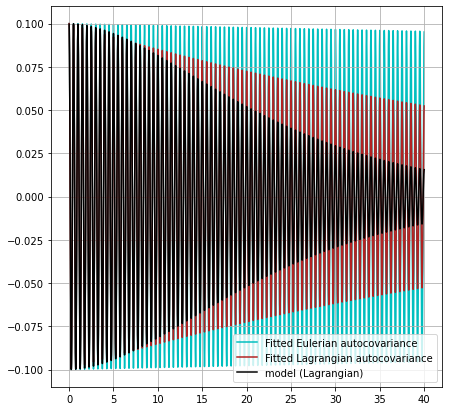

In [21]:
Y = [2300,1475,700]
for y in Y:
    fig,ax = plt.subplots(figsize=(7,7))
    
    ax.plot(tau, 0.1*np.cos(omega*tau)*np.exp(-tau/Te_sat[i]['E_u_avg'].sel(ybin=y,method='nearest').values),c='c',zorder=-1,
            label='Fitted Eulerian autocovariance')
    ax.plot(tau, 0.1*np.cos(omega*tau)*np.exp(-tau/Tl_sat[i]['L_u_avg'].sel(ybin=y,method='nearest').values),c='firebrick',
            label='Fitted Lagrangian autocovariance')
    ax.plot(tau, Ctilde(tau,Te_sat[i]['E_u_avg'].sel(ybin=y,method='nearest').values,
                     Tbl_sat[i]['L_u_avg'].sel(ybin=y,method='nearest').values,
                     ds[i].Ta.sel(ybin=y,method='nearest').values,0.1),c='k',label='model (Lagrangian)')
    ax.grid();ax.legend()

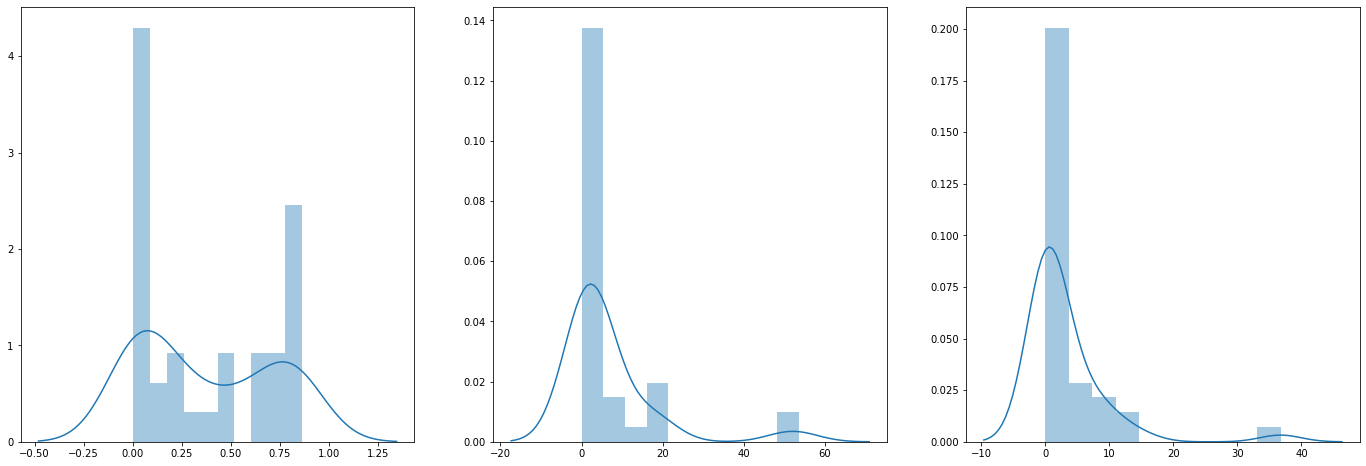

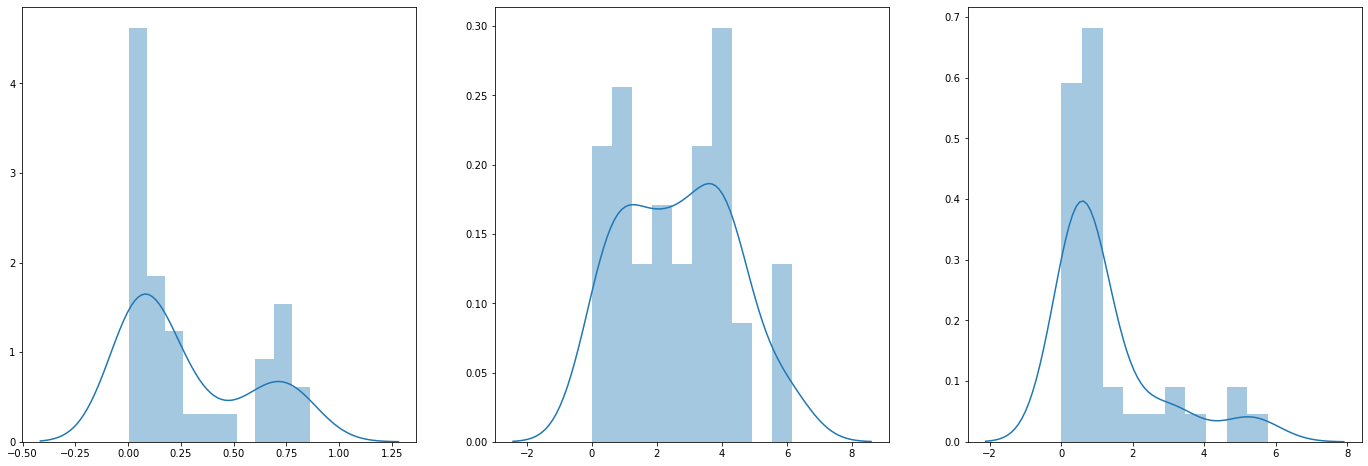

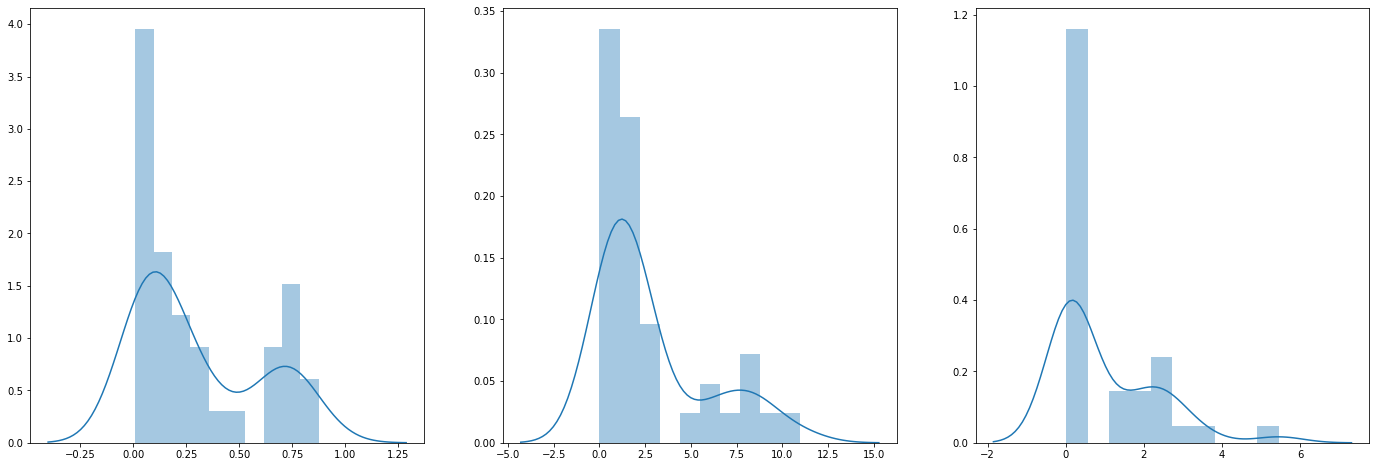

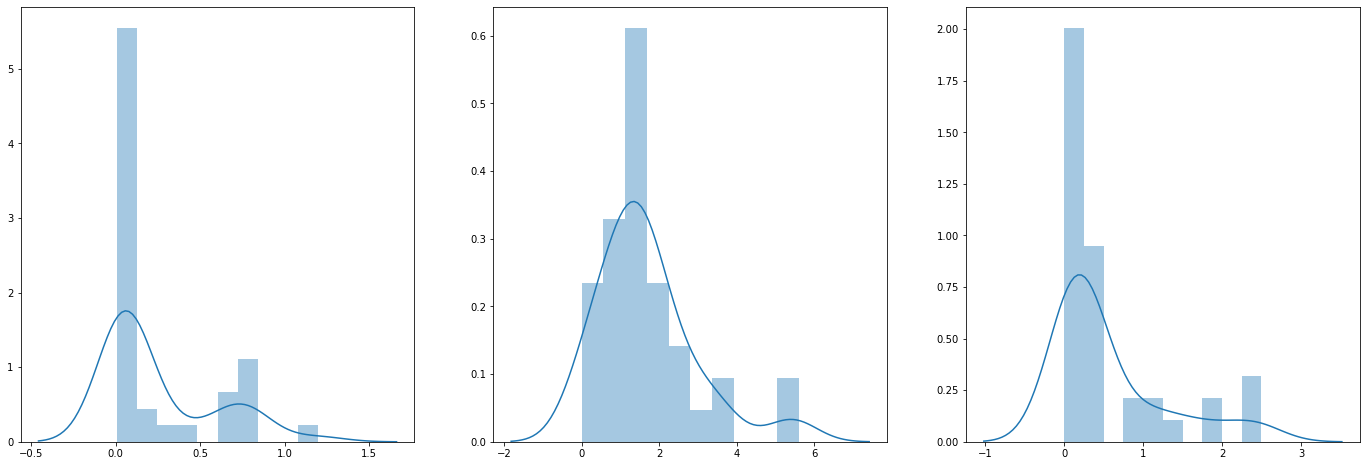

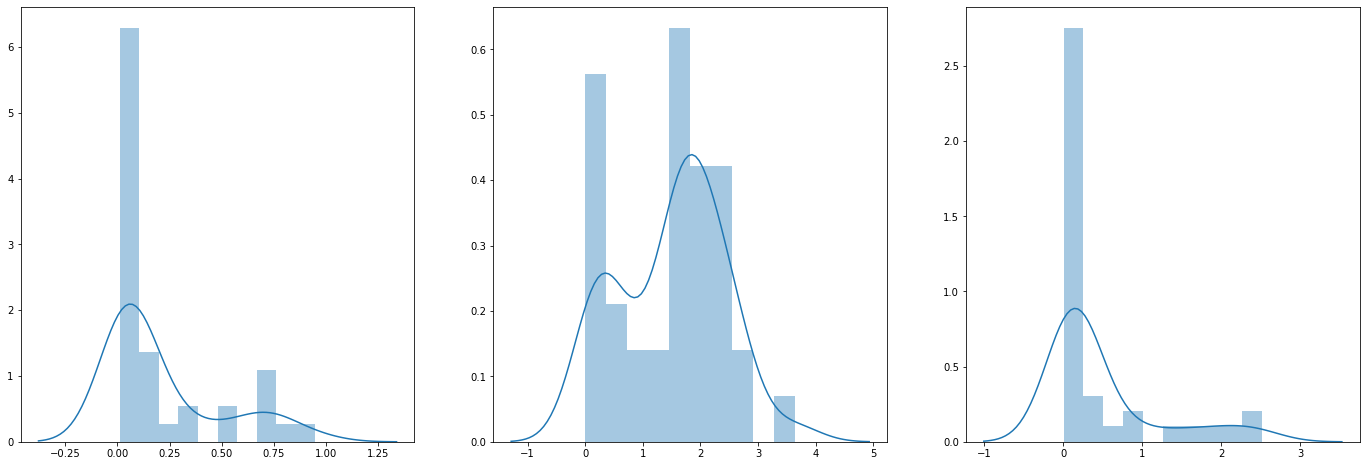

In [23]:
#fig,ax = plt.subplots(1,3,figsize=(24,8))
for i,d in enumerate(ds):
    x1 = Tl[i]/Te[i]
    x2 = Tbmean[i]**2*phi_mu(Tl[i],Tbmean[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl[i]*Tbmean[i]*phi_sigma(Tl[i],Tbmean[i])
    fig,ax  = plt.subplots(1,3,figsize=(24,8))
    sns.distplot(x1,kde=True,ax=ax[0],bins=10)
    sns.distplot(x2,kde=True,ax=ax[1],bins=10)
    sns.distplot(x3,kde=True,ax=ax[2],bins=10)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

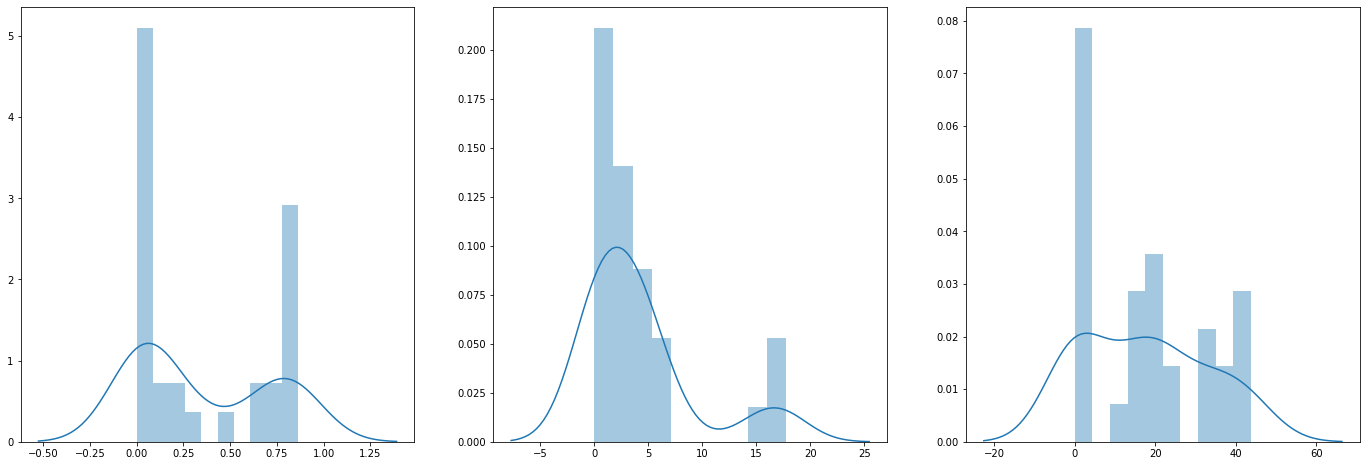

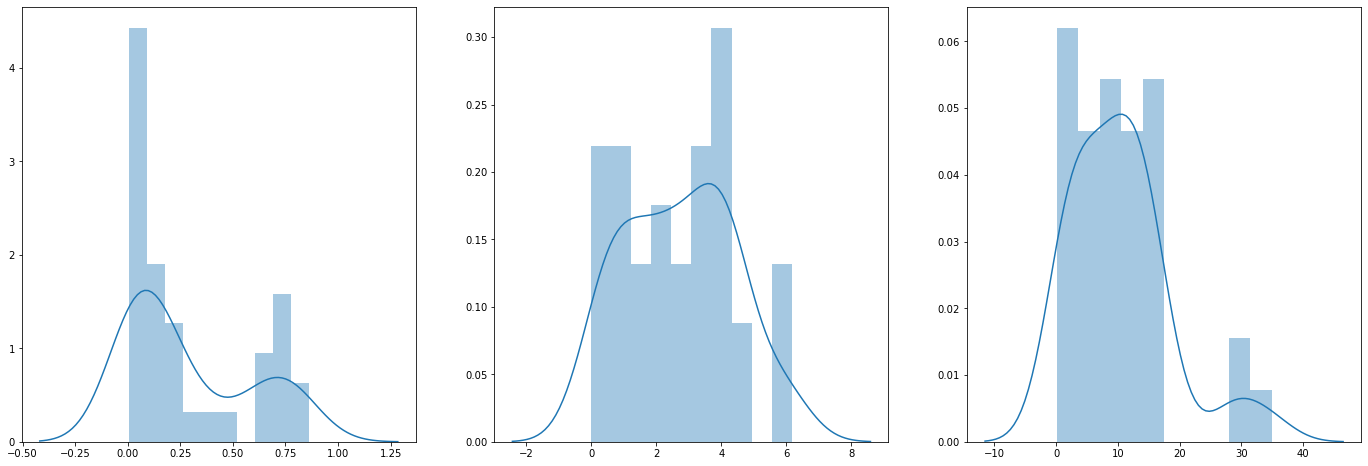

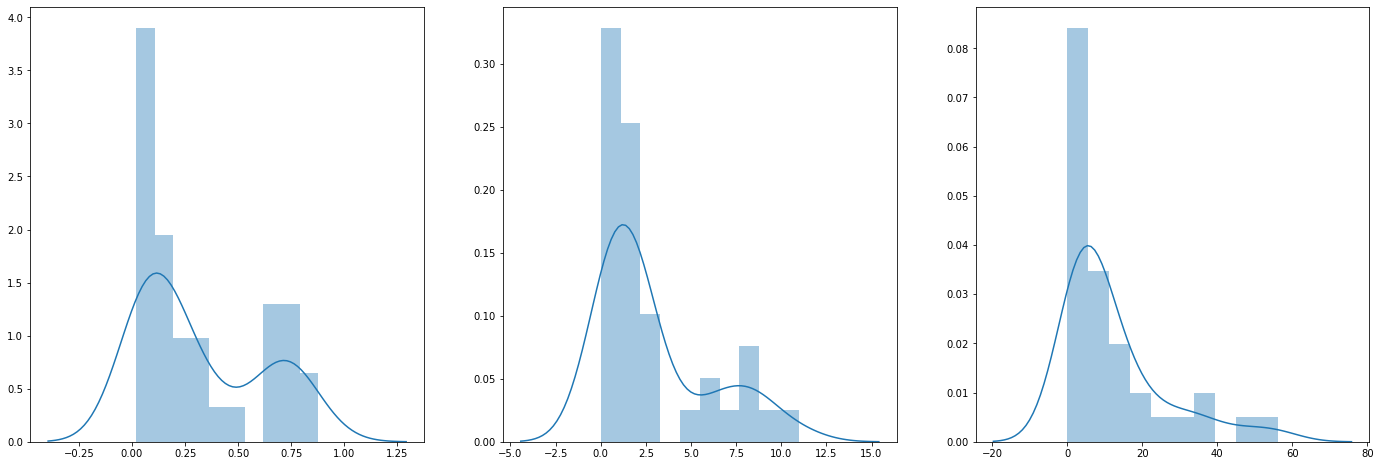

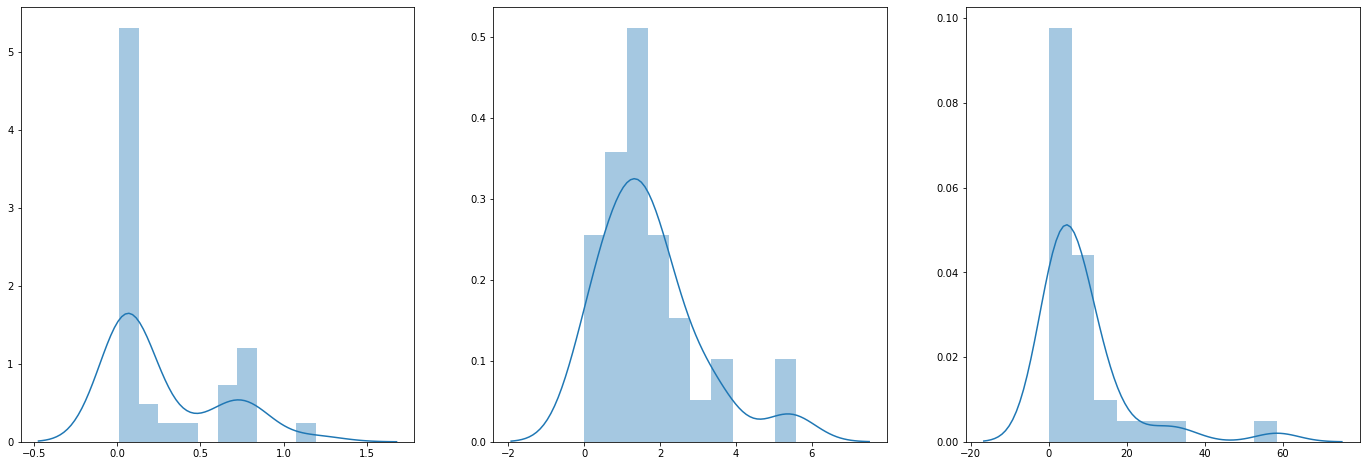

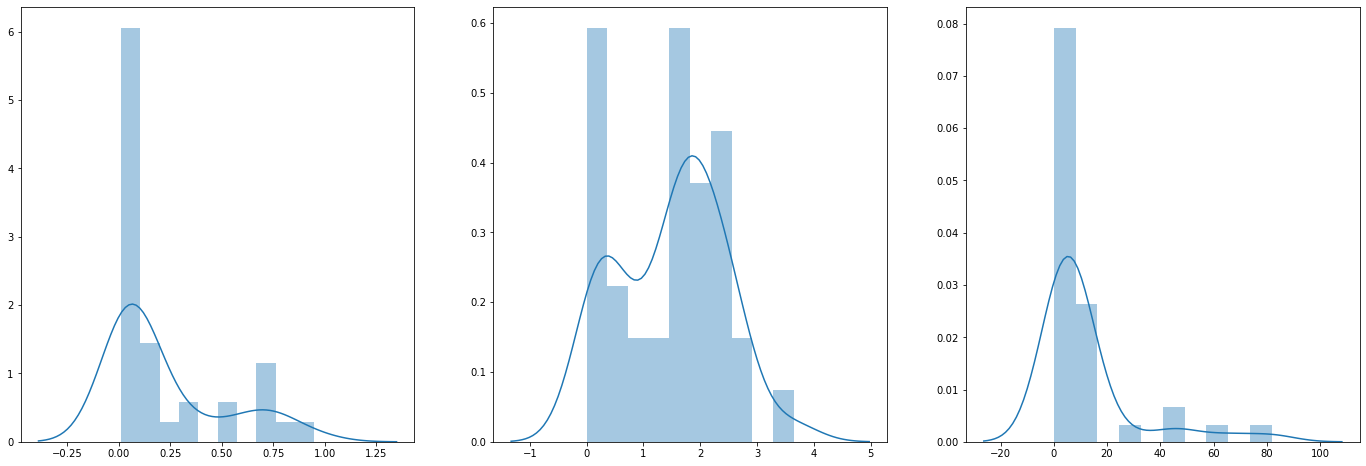

In [108]:
for i,d in enumerate(ds):
    x1 = Tl_sat[i]/Te_sat[i]
    x2 = Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/d.Ta)**2
    x3 = (2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])
    fig,ax  = plt.subplots(1,3,figsize=(24,8))
    sns.distplot(x1,kde=True,ax=ax[0],bins=10)
    sns.distplot(x2,kde=True,ax=ax[1],bins=10)
    sns.distplot(x3,kde=True,ax=ax[2],bins=10)

In [109]:
X1,X2,X3 = np.array([]),np.array([]),np.array([])
for i,d in enumerate(ds):
    X1 = np.insert(X1,0,(Tl_sat[i]/Te_sat[i]).values)
    X2 = np.insert(X2,0,(Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/d.Ta)**2).values)
    X3 = np.insert(X3,0,((2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])).values)

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

<AxesSubplot:>

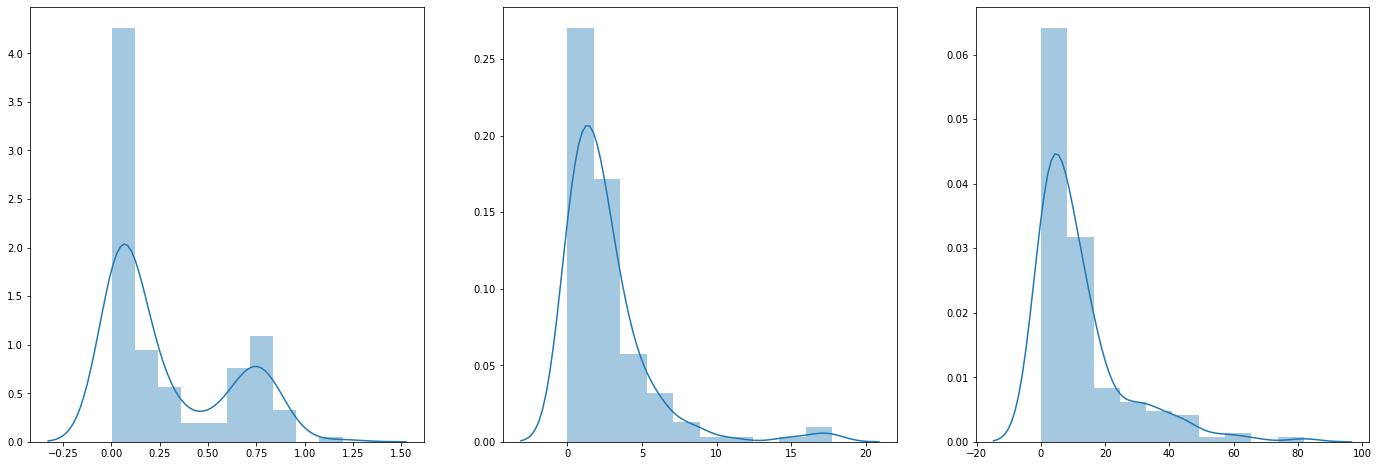

In [111]:
fig, ax = plt.subplots(1,3,figsize=(24,8))
sns.distplot(X1,ax=ax[0],kde=True,bins=10)
sns.distplot(X2,ax=ax[1],kde=True,bins=10)
sns.distplot(X3,ax=ax[2],kde=True,bins=10)

In [112]:
tau = np.arange(0,100,10/(24*60))

In [125]:
Tau,TE = np.meshgrid(tau,Te_sat[0])
Tau,Tbm = np.meshgrid(tau,Tbmean_sat[0])
TA = np.meshgrid(tau,ds[0].Ta.where(Tl[0]>=1.1,drop=True).where(Te[0]<=2000,drop=True))[1]

#x2 = Tbmean_sat[i]**2*phi_mu(Tl_sat[i],Tbmean_sat[i])**2*(2*np.pi/ds.Ta)**2
#x3 = (2*np.pi/d.Ta)**2*Tl_sat[i]*Tbmean_sat[i]*phi_sigma(Tl_sat[i],Tbmean_sat[i])

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


In [126]:
xx2 = xr.DataArray(Tbm**2*phi_mu(Tau,Tbm)**2*(2*np.pi/TA)**2,dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})
xx1 = xr.DataArray(Tau/TE,dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})
xx3 = xr.DataArray((2*np.pi/TA)**2*Tau*Tbm*phi_sigma(Tau,Tbm),dims=['y_bins','tau'],coords={'y_bins':Te_sat[0].ybin.values,'tau':tau})

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


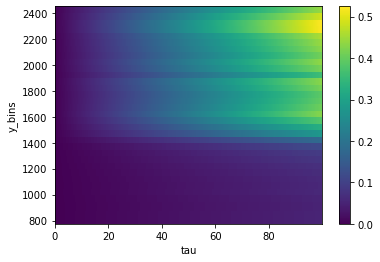

In [127]:
xx1.plot(add_colorbar=True)

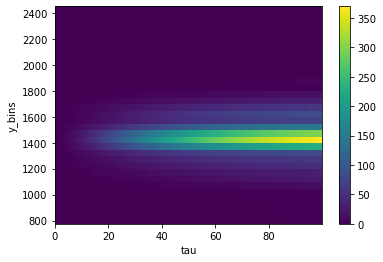

In [128]:
xx2.plot()

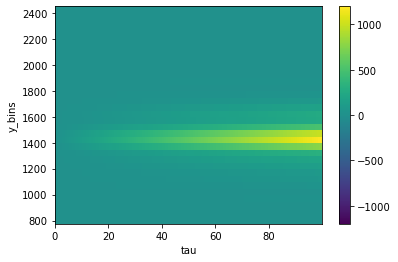

In [133]:
xx3.plot(cmap='viridis')

In [134]:
Tl_sat[0].max()

<xarray.DataArray 'L_u_avg' ()>
array(523.18782821)
Coordinates:
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    param         <U2 'Tt'

<AxesSubplot:>

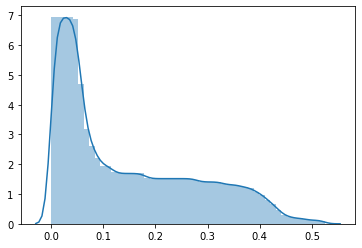

In [150]:
sns.distplot(xx1)

<AxesSubplot:>

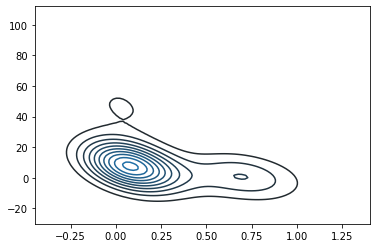

In [149]:
sns.kdeplot(x1,x3)